# SARIMA

Apakah kamu pernah mendengar tentang prediksi penjualan atau peramalan data? Bayangkan kamu adalah seorang pemilik toko yang ingin tahu berapa banyak barang yang harus dibeli untuk bulan depan agar tidak kehabisan stok. Bagaimana kamu bisa tahu? Di sinilah SARIMA datang membantu!

SARIMA adalah singkatan dari Seasonal Autoregressive Integrated Moving Average. Ini adalah metode yang digunakan untuk memprediksi nilai di masa depan berdasarkan data yang sudah ada sebelumnya. SARIMA sangat bagus untuk data yang memiliki pola musiman, seperti penjualan bulanan.

### Fungsi SARIMA
Pikirkan SARIMA sebagai alat untuk menghitung dan menebak seberapa banyak barang yang akan terjual di bulan-bulan berikutnya. Berikut adalah langkah-langkah bagaimana SARIMA bekerja:
1. Mempelajari Data Sebelumnya: SARIMA melihat data penjualan bulan-bulan sebelumnya untuk menemukan pola. Misalnya, jika kamu melihat bahwa penjualan selalu meningkat di bulan Desember karena Natal, SARIMA akan mencatat hal itu.
2. Menghilangkan Tren dan Pola: Sebelum membuat prediksi, SARIMA bisa membantu menghilangkan tren yang tidak diinginkan (seperti penjualan yang selalu naik) dan pola musiman (seperti penjualan yang meningkat setiap akhir tahun).
3. Membuat Prediksi: Setelah mempelajari data dan menghilangkan pola yang tidak perlu, SARIMA akan membuat prediksi untuk bulan-bulan berikutnya. Misalnya, setelah melihat data sebelumnya, SARIMA mungkin menyimpulkan bahwa pada bulan Januari, penjualan diperkirakan akan mencapai 500 unit.
4. Mengukur Ketepatan: Setelah prediksi dilakukan, SARIMA bisa membandingkan hasil prediksinya dengan data asli untuk melihat seberapa akurat prediksinya. Jika akurat, itu berarti SARIMA melakukan pekerjaan dengan baik!

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima

# 1. Penggunaan Data

In [2]:
try:
    df = pd.read_csv("Superstore.csv", sep=",") 
    sales_data = df[['Order Date', 'Sales']] 
    sales_data = pd.DataFrame(sales_data) 
    sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date']) 
    display(sales_data)
    print(sales_data.head(10))
except FileNotFoundError:
    print("Tidak dapat membaca")

,Order Date,Sales
0,2016-11-08,261.9600
1,NaT,NaN
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,NaT,NaN


  Order Date     Sales
0 2016-11-08  261.9600
1        NaT       NaN
2 2016-06-12   14.6200
3 2015-10-11  957.5775
4 2015-10-11   22.3680
5        NaT       NaN
6 2014-06-09    7.2800
7 2014-06-09  907.1520
8 2014-06-09   18.5040
9 2014-06-09  114.9000


In [3]:
display(sales_data)

,Order Date,Sales
0,2016-11-08,261.9600
1,NaT,NaN
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,NaT,NaN


In [4]:
# kita ambil "Order Date" untuk dijadikan sebagai index
df1 = sales_data.set_index('Order Date') 

# coba ambil data bulanan menjadi sample dan kemudian kita hitung rata-rata setiap bulan
sales_data = df1.resample('M').mean() 
sales_data.head(100)

,Sales
Order Date,
2014-01-31,224.101296
2014-02-28,115.036545
2014-03-31,413.836966
2014-04-30,220.961692
2014-05-31,206.656020
2014-06-30,276.631454
2014-07-31,264.470482
2014-08-31,196.888813
2014-09-30,329.595938


# 2. Visualisasikan Data Bulanan Tersebut

In [5]:
plt.figure(figsize=(8, 6)) 
plt.plot(monthly_sales['Sales'], linewidth=3, c='black') 
plt.title("Monthly sales") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.show()

NameError: name 'monthly_sales' is not defined

<Figure size 800x600 with 0 Axes>

# 3. Lakukan Uji Statistioner

Langkah ini untuk menguji apakah data sudah statistik atau belum:
- Kalau datanya stasioner, artinya polanya tidak berubah terlalu banyak dari waktu ke waktu. Misalnya, penjualan naik atau turun tetapi rata-rata dan bentuk grafiknya tetap sama sepanjang waktu.
- Kalau datanya tidak stasioner, maka grafiknya bisa naik terus, turun terus, atau punya pola yang berubah-ubah, misalnya lebih tinggi di bulan tertentu dan lebih rendah di bulan lainnya.

Cara uji statistioner dapat dilakukan secara langsung dengan melihat grafiknya, tetapi ada juga penggunaan rumus untuk melihat apakah data sudah statistioner atau belum yaitu menggunakan teknik Augmented Dickey-Fuller (ADF).

### Hasil Uji:

Hasil uji menggunakan metode ADF sama seperti uji statistik, semakin ADF statictik jauh dari 0 maka data tersebut semakin stabil.

Hasil uji tersebut terbagi menjadi:
- jika p-value < 0,05 => data hasil uji stabil (Stationary)
- jika p-value > 0,05 => data hasil uji tidak stabil (Non Stationeary)

Selain itu, melihat dari data "Staionary" juga lebih baik. Nilai hasil "Stationary" harus lebih kecil dari nilai ADF, semakin kecil, menunjukkan data statisioner

In [6]:
def check_stationarity(timeseries): 
    result = adfuller(timeseries, autolag='AIC') 
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print(f'Statisioner: {result[4]}')
    if p_value < 0.05:
        Stasioner = 'stasioner'
    else:
        Stasioner = 'Non-stasioner'
    print(f'Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah {Stasioner}' )
    

check_stationarity(sales_data['Sales'])

ADF Statistic: -9.758383322175126
p-value: 7.679736470949318e-17
Statisioner: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah stasioner


# 4. Tentukan Parameter SARIMA

Tentukan parameter uji dan test

In [7]:
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

In [8]:
model_auto = auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True)
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=428.322, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=426.748, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=426.848, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=530.710, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=424.749, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=426.749, Time=0.19 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=428.745, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=426.431, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=426.554, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=424.865, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=428.584, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=466.975, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.743 seconds
                         

## Pada SARIMA, kita mengenal:
### p 
- p menunjukkan model akan "menggunakan berapa data bulan ke belakang untuk memprediksi bulan depan". Semakin besar p, semakin banyak bulan yang dilihat.

### d 
- d adalah “differencing” untuk menghilangkan tren.
- Bayangkan kamu punya data penjualan yang setiap bulan cenderung selalu naik terus menerus. d ini berfungsi untuk mengurangi atau menghilangkan tren kenaikan tersebut supaya datanya jadi lebih stabil dan tidak terlalu miring ke atas atau ke bawah.
- Cara kerja: Misalnya, kalau d=1, kita mengurangi setiap nilai dengan nilai sebelumnya. Jadi, kalau bulan ini penjualannya naik dari bulan sebelumnya, kita cuma lihat selisihnya, bukan jumlah totalnya.
- Gunanya: Untuk menghilangkan tren naik atau turun yang konsisten

### q 
- q mirip dengan p, tetapi pada q melihat kesalahan model dari bulan-bulan sebelumnya, jadi kalau ada salah di satu bulan, model bisa belajar dari kesalahan itu.

### P
- memiliki fungsi yang sama dengan p, tetapi pada P melihat pola tahunan

### D 
- D adalah “differencing” untuk menghilangkan pola musiman.
- Ini bekerja pada pola yang berulang setiap musim. Misalnya, jika penjualan selalu naik di akhir tahun, itu adalah pola musiman tahunan.
- D membantu menghilangkan pola berulang ini dengan membandingkan nilai saat ini dengan nilai yang sama di musim sebelumnya. Jika musimnya tahunan dan data bulanan, maka kita bandingkan nilai sekarang dengan nilai 12 bulan sebelumnya.
- Contoh: Kalau D=1, kita akan melihat perbedaan nilai penjualan dengan nilai satu tahun sebelumnya (12 bulan lalu).

### Q 
- Q mirip dengan q, tetapi pada Q melihat pola tahunan.

### S
- s adalah jumlah bulan dalam satu musim. Kalau data kamu bulanan dan pola musimnya tahunan, maka s=12.

In [9]:
# p, d, q = model_auto.order
# P, D, Q, s = model_auto.seasonal_order  

p, d, q = 2,2,1
P, D, Q, s = 1,1,2,12

In [10]:
df = pd.read_csv("coffeshop-exog.csv", sep=';')
display(df)

# Mengubah format data
# Fungsi id_vars untuk membaca baris
# Fungsi var_name untuk membaca kolom
# Fungsi value_name untuk membaca hasil
pisahdata = df.melt(id_vars=['Bulan'], var_name='Tahun', value_name='Sales')

# Mengubah kolom data sebelumnya yang sudah kita buat menjadi satu data tanggal yang utuh
pisahdata['Tanggal'] = pd.to_datetime(pisahdata['Tahun'] + ' ' + pisahdata['Bulan'])
# print(pisahdata)

# Menyesuaikan semua tanggal menjadi akhir bulan
pisahdata['Tanggal'] = pisahdata['Tanggal'] + pd.offsets.MonthEnd(0)

# Mengatur Tanggal sebagai indeks dan memilih kolom yang relevan
holiday = pisahdata.set_index('Tanggal')[['Sales']]
display(holiday)


,Bulan,2014,2015,2016,2017
0,January,1,1,1,1
1,February,1,1,1,1
2,March,0,0,0,0
3,April,1,1,1,1
4,May,0,0,0,0
5,June,0,0,0,0
6,July,0,0,0,0
7,August,0,0,0,0
8,September,0,0,0,0
9,October,0,0,0,0


,Sales
Tanggal,
2014-01-31,1
2014-02-28,1
2014-03-31,0
2014-04-30,1
2014-05-31,0
2014-06-30,0
2014-07-31,0
2014-08-31,0
2014-09-30,0


In [11]:
exog_vars = holiday

# 5. Latih Model SARIMA

In [12]:
model = SARIMAX(sales_data, order=(p, d, q), seasonal_order=(P, D, Q, s), exog=exog_vars) 
results = model.fit()
model

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


# 6. Prediksi Periode Mendatang dengan SARIMA

In [13]:
Periode = 12
exog_future = pd.DataFrame({
    'Sales': [1 if (i.month == 1 or i.month == 12 or i.month == 2 or i.month == 4 or i.month == 11) else 0 for i in pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), 
                                                                                  periods=Periode, freq='MS')]
}, index=pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=Periode, freq='MS'))

# Lakukan prediksi dengan eksogen masa depan
Prediksi = results.get_forecast(steps=Periode, exog=exog_future)
Rata_Prediksi = Prediksi.predicted_mean
Confiden_Interval_Prediksi = Prediksi.conf_int()
print(Periode)

12


In [14]:
# Menampilkan hasil prediksi
print("Rata-rata Prediksi Bulanan:")
display(Rata_Prediksi)

# Menampilkan interval kepercayaan untuk setiap prediksi
print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(Confiden_Interval_Prediksi)

Rata-rata Prediksi Bulanan:


2018-01-31    293.709104
2018-02-28    167.466283
2018-03-31    312.344497
2018-04-30    198.983411
2018-05-31    197.551097
2018-06-30    194.315650
2018-07-31    194.521803
2018-08-31    195.970009
2018-09-30    201.734635
2018-10-31    210.192704
2018-11-30    199.428042
2018-12-31    200.841003
Freq: M, Name: predicted_mean, dtype: float64


Interval Kepercayaan Prediksi (Lower, Upper):


,lower Sales,upper Sales
2018-01-31,157.083583,430.334625
2018-02-28,27.385957,307.546608
2018-03-31,157.239412,467.449582
2018-04-30,17.985421,379.981401
2018-05-31,5.652305,389.449889
2018-06-30,-15.926367,404.557666
2018-07-31,-33.950595,422.994201
2018-08-31,-47.555501,439.495520
2018-09-30,-60.033692,463.502962
2018-10-31,-68.175311,488.560720


## Hasil Prediksi Berdasarkan Kepercayaan Rata-Rata

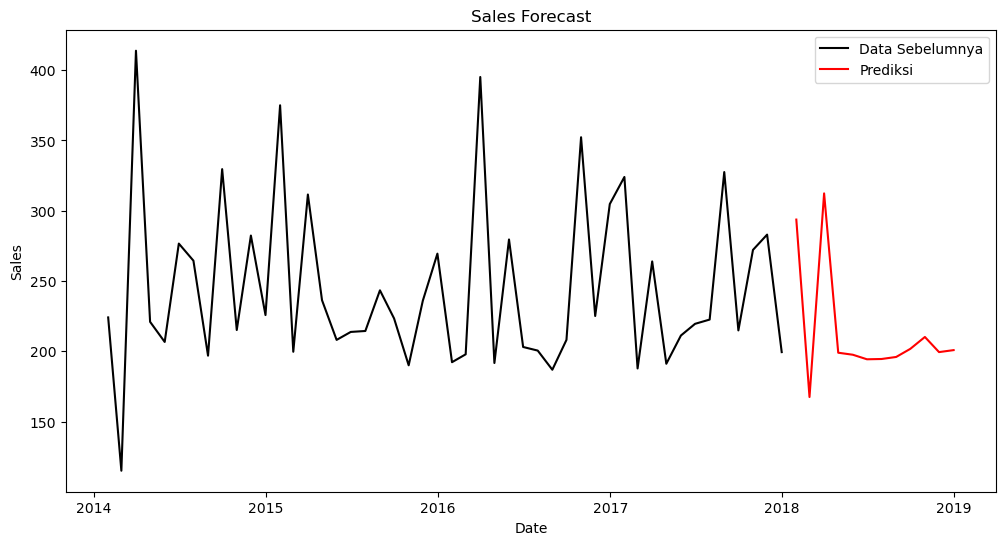

In [15]:
# Visualisasi Prediksi
plt.figure(figsize=(12, 6)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

## Hasil Prediksi Berdasarkan Maximum dan Minimum Prediksi

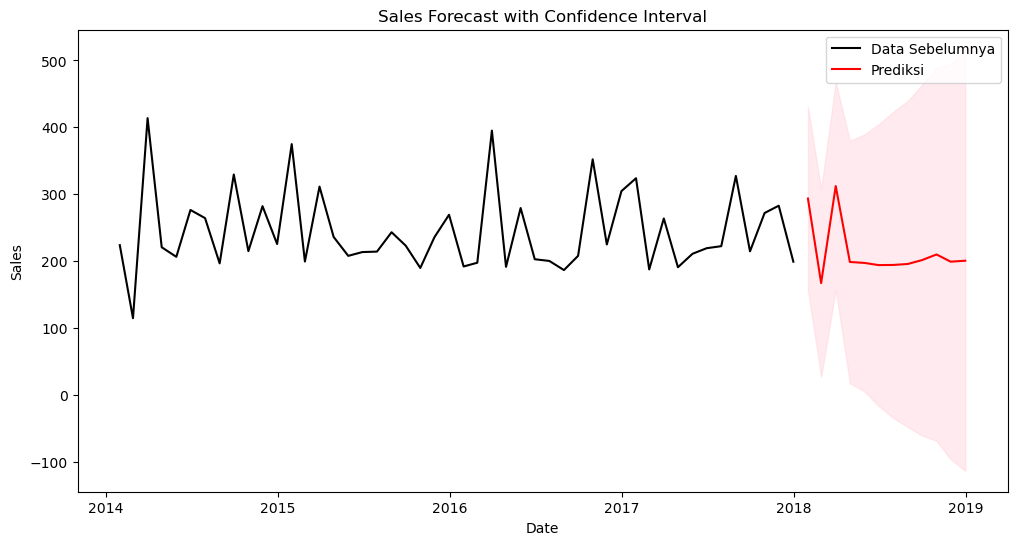

In [16]:
# Visualisasi dengan Interval Kepercayaan
plt.figure(figsize=(12, 6)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.fill_between(Confiden_Interval_Prediksi.index, Confiden_Interval_Prediksi.iloc[:, 0], Confiden_Interval_Prediksi.iloc[:, 1], color='pink', alpha=0.3) 
plt.title("Sales Forecast with Confidence Interval") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

# Prediksi bulan sebelumnya dan menilai dengan mape mae dan mse

                 Sales
Order Date            
2014-01-31  224.101296
2014-02-28  115.036545
2014-03-31  413.836966
2014-04-30  220.961692
2014-05-31  206.656020
2014-06-30  276.631454
2014-07-31  264.470482
2014-08-31  196.888813
2014-09-30  329.595938
2014-10-31  215.146796
2014-11-30  282.333211
2014-12-31  225.782397
2015-01-31  375.022445
2015-02-28  199.667750
2015-03-31  311.543462
2015-04-30  236.365248
2015-05-31  208.108661
2015-06-30  213.772860
2015-07-31  214.449480
2015-08-31  243.375803
2015-09-30  223.371616
2015-10-31  190.033293
2015-11-30  235.958950
2015-12-31  269.474724
2016-01-31  192.249104
2016-02-29  197.850113
2016-03-31  395.151351
2016-04-30  191.666168
2016-05-31  279.551957
2016-06-30  203.066234
2016-07-31  200.504413
2016-08-31  186.876680
2016-09-30  208.122632
2016-10-31  352.288799
2016-11-30  225.109619
2016-12-31  304.755056
                 Sales
Order Date            
2017-01-31  324.024098
2017-02-28  187.791603
2017-03-31  263.933004
2017-04-30 

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Interval Kepercayaan Prediksi (Lower, Upper):


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,lower Sales,upper Sales
2017-01-31,247.617959,504.295600
2017-02-28,68.622064,330.467602
2017-03-31,288.622522,591.608208
2017-04-30,114.933855,474.483220
2017-05-31,76.720621,463.106962
2017-06-30,98.255666,539.133944
2017-07-31,62.648196,550.660125
2017-08-31,21.883843,552.311747
2017-09-30,56.792025,643.882828
2017-10-31,-34.785262,598.234191


2017-01-31    375.956780
2017-02-28    199.544833
2017-03-31    440.115365
2017-04-30    294.708538
2017-05-31    269.913792
2017-06-30    318.694805
2017-07-31    306.654160
2017-08-31    287.097795
2017-09-30    350.337427
2017-10-31    281.724465
2017-11-30    328.878572
2017-12-31    332.877043
Freq: M, Name: predicted_mean, dtype: float64

MAE: 79.18148790774748
MSE: 8745.338104759476
MAPE: 34.6671250653713%


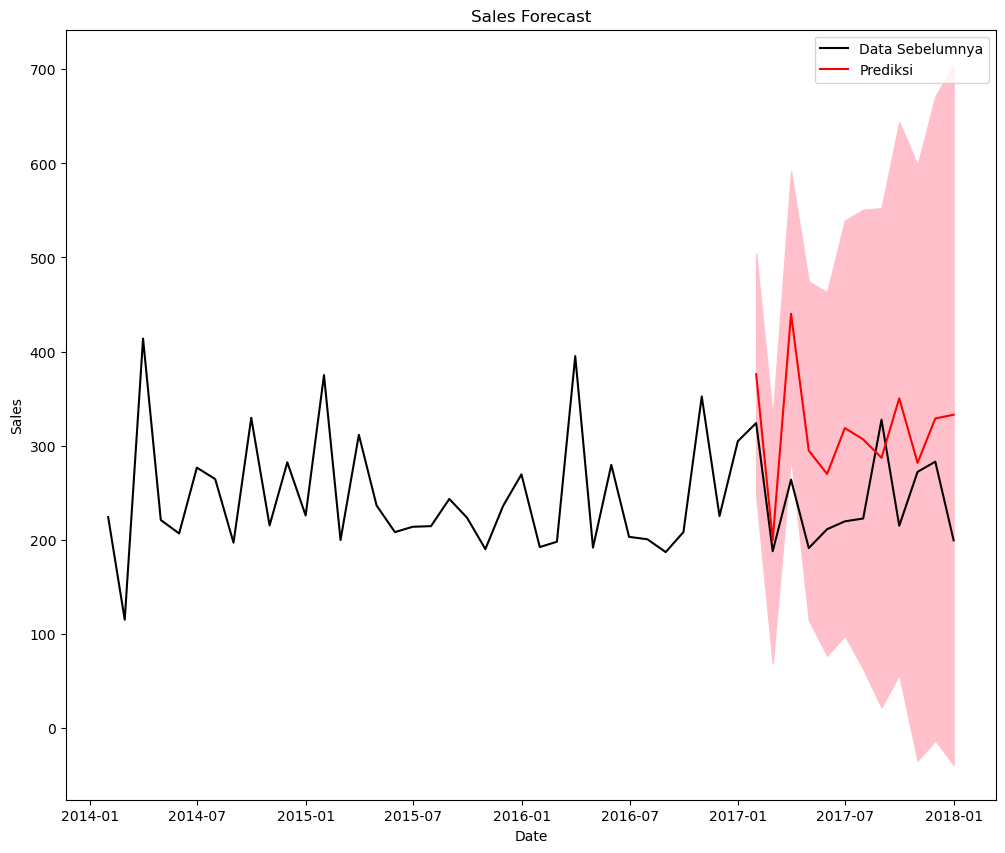

In [22]:
train_data = sales_data[:-12]
test_data = sales_data[-12:]
print(train_data)
print(test_data)
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(confidence_interval, predicted_mean)

mae = mean_absolute_error(test_data, predicted_mean)
mse = mean_squared_error(test_data, predicted_mean)
mape = np.mean(np.abs((test_data.values.flatten() - predicted_mean.values.flatten()) / test_data.values.flatten())) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')

plt.figure(figsize=(12, 10)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(predicted_mean, label='Prediksi', color='red') 
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

In [23]:
display(predicted_mean)
display(test_data)

2017-01-31    375.956780
2017-02-28    199.544833
2017-03-31    440.115365
2017-04-30    294.708538
2017-05-31    269.913792
2017-06-30    318.694805
2017-07-31    306.654160
2017-08-31    287.097795
2017-09-30    350.337427
2017-10-31    281.724465
2017-11-30    328.878572
2017-12-31    332.877043
Freq: M, Name: predicted_mean, dtype: float64

,Sales
Order Date,
2017-01-31,324.024098
2017-02-28,187.791603
2017-03-31,263.933004
2017-04-30,191.129090
2017-05-31,211.229721
2017-06-30,219.536106
2017-07-31,222.571082
2017-08-31,327.515333
2017-09-30,214.867209


# MLP dengan menggunakan data dari masa lalu

In [25]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

# Misalkan Rata_Prediksi sudah dihitung dari output SARIMA
# Buat DataFrame sebagai contoh, dengan kolom 'sarima_forecast' dan 'actual_sales'
# actual_sales ini diambil dari data historis sebagai target
data = pd.DataFrame({
    'sarima_forecast': predicted_mean,  # Nilai prediksi titik tengah dari SARIMA
    'actual_sales': sales_data['Sales'][-len(predicted_mean):]  # Nilai penjualan sebenarnya pada periode yang sama
})

# Pisahkan X dan y (fitur dan target)
X = data[['sarima_forecast']]  # Fitur menggunakan prediksi SARIMA
y = data['actual_sales']  # Target adalah nilai penjualan yang sesungguhnya

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur (X) dan target (y)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

mape_small = []
i = 1
while i <= 10:
# Bangun model MLPRegressor
    mlp = MLPRegressor(hidden_layer_sizes=(i,), max_iter=500, random_state=42)  # 1 neuron pada hidden layer
    mlp.fit(X_train_scaled, y_train_scaled.ravel())
    y_pred_scaled = mlp.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_pred_series = pd.Series(y_pred.flatten(), index=y_test.index)
    mape = mean_absolute_percentage_error(y_test, y_pred_series) * 100
    mape_small.append(mape)
    print(f"Nilai MAPE untuk Model Hybrid SARIMA-MLP {i} adalah:", mape, "%")
    i += 1
    
hasilkecil = min(mape_small)
kecilindex = mape_small.index(hasilkecil)+1

mlp = MLPRegressor(hidden_layer_sizes=(kecilindex), max_iter=500, random_state=42)  # 1 neuron pada hidden layer
mlp.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_scaled = mlp.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_pred_series = pd.Series(y_pred.flatten(), index=y_test.index)
mape = mean_absolute_percentage_error(y_test, y_pred_series) * 100
mape_small.append(mape)
print(f"Nilai MAPE untuk Model Hybrid SARIMA-MLP {i} adalah:", mape, "%")

print(hasilkecil)
# Menampilkan hasil prediksi dan data uji
print("\nActual Sales (y_test):")
print(y_test)
print("\nPrediksi Sales (y_pred):")
print(y_pred_series)
print("\n (sarima_forecast, actual_sales):")
print(data)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Nilai MAPE untuk Model Hybrid SARIMA-MLP 1 adalah: 15.13140230824883 %


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Nilai MAPE untuk Model Hybrid SARIMA-MLP 2 adalah: 39.20682910093083 %
Nilai MAPE untuk Model Hybrid SARIMA-MLP 3 adalah: 22.576711042647112 %


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Nilai MAPE untuk Model Hybrid SARIMA-MLP 4 adalah: 12.17062891080352 %


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Nilai MAPE untuk Model Hybrid SARIMA-MLP 5 adalah: 22.540094514259312 %
Nilai MAPE untuk Model Hybrid SARIMA-MLP 6 adalah: 20.759119365670063 %


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Nilai MAPE untuk Model Hybrid SARIMA-MLP 7 adalah: 26.817484364506168 %


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Nilai MAPE untuk Model Hybrid SARIMA-MLP 8 adalah: 20.762019809025826 %


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Nilai MAPE untuk Model Hybrid SARIMA-MLP 9 adalah: 21.247712333883083 %
Nilai MAPE untuk Model Hybrid SARIMA-MLP 10 adalah: 20.870854472297328 %
Nilai MAPE untuk Model Hybrid SARIMA-MLP 11 adalah: 12.17062891080352 %
12.17062891080352

Actual Sales (y_test):
2017-11-30    283.009868
2017-10-31    272.138916
2017-01-31    324.024098
Name: actual_sales, dtype: float64

Prediksi Sales (y_pred):
2017-11-30    256.090529
2017-10-31    250.309874
2017-01-31    262.528219
dtype: float64

 (sarima_forecast, actual_sales):
            sarima_forecast  actual_sales
2017-01-31       375.956780    324.024098
2017-02-28       199.544833    187.791603
2017-03-31       440.115365    263.933004
2017-04-30       294.708538    191.129090
2017-05-31       269.913792    211.229721
2017-06-30       318.694805    219.536106
2017-07-31       306.654160    222.571082
2017-08-31       287.097795    327.515333
2017-09-30       350.337427    214.867209
2017-10-31       281.724465    272.138916
2017-11-30       3

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
# Prediksi SARIMA untuk periode mendatang (misal, 12 bulan berikutnya)
future_sarima_forecast = results.get_forecast(steps=12).predicted_mean

print(future_sarima_forecast)
# Standardisasi prediksi SARIMA
future_sarima_scaled = scaler_X.transform(future_sarima_forecast.values.reshape(-1, 1))

print(future_sarima_scaled)
# Prediksi menggunakan model MLP
future_pred_scaled = mlp.predict(future_sarima_scaled)

# Kembalikan hasil prediksi ke skala asli
future_pred = scaler_y.inverse_transform(future_pred_scaled.reshape(-1, 1))

# Hasil prediksi untuk 12 bulan mendatang
future_pred_series = pd.Series(future_pred.flatten(), index=pd.date_range(start="2024-01-01", periods=12, freq='MS'))
print("Prediksi Penjualan Masa Depan:")
print(future_pred_series)


2017-01-31    375.956780
2017-02-28    199.544833
2017-03-31    440.115365
2017-04-30    294.708538
2017-05-31    269.913792
2017-06-30    318.694805
2017-07-31    306.654160
2017-08-31    287.097795
2017-09-30    350.337427
2017-10-31    281.724465
2017-11-30    328.878572
2017-12-31    332.877043
Freq: M, Name: predicted_mean, dtype: float64
[[ 1.05946899]
 [-1.8225273 ]
 [ 2.10761117]
 [-0.2678625 ]
 [-0.67292784]
 [ 0.12399493]
 [-0.07270996]
 [-0.39219724]
 [ 0.64093225]
 [-0.47997994]
 [ 0.2903645 ]
 [ 0.35568649]]
Prediksi Penjualan Masa Depan:
2024-01-01    262.528219
2024-02-01    240.237933
2024-03-01    257.262137
2024-04-01    251.901600
2024-05-01    248.861995
2024-06-01    254.842093
2024-07-01    253.366022
2024-08-01    250.968594
2024-09-01    258.721184
2024-10-01    250.309874
2024-11-01    256.090529
2024-12-01    256.580704
Freq: MS, dtype: float64


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
